In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt

In [2]:
data_dir = "C:/Users/shash/Downloads/train (1) (1)/train"

img_height = 180
img_width = 180
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size )

class_names = train_ds.class_names
print("class_names:",class_names)

Found 350 files belonging to 7 classes.
Using 280 files for training.
Found 350 files belonging to 7 classes.
Using 70 files for validation.
class_names: ['Angry', 'Disguist', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']


In [3]:
# 2
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [4]:
# 3
model = models.Sequential([
    layers.Rescaling(1./255, input_shape = (img_height, img_width,3)),
    layers.Conv2D(32,3,activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,activation ='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(len(class_names),activation = 'softmax')
])

C:\Users\shash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# 4
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [6]:
# 5 
epochs = 10
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 545ms/step - accuracy: 0.1257 - loss: 2.5946 - val_accuracy: 0.1000 - val_loss: 1.9525
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 460ms/step - accuracy: 0.2196 - loss: 1.9314 - val_accuracy: 0.0714 - val_loss: 1.9547
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 437ms/step - accuracy: 0.2322 - loss: 1.8813 - val_accuracy: 0.2000 - val_loss: 1.9417
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 429ms/step - accuracy: 0.3047 - loss: 1.7750 - val_accuracy: 0.1429 - val_loss: 1.9280
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 414ms/step - accuracy: 0.4671 - loss: 1.5594 - val_accuracy: 0.1429 - val_loss: 2.0333
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 435ms/step - accuracy: 0.5156 - loss: 1.2899 - val_accuracy: 0.1714 - val_loss: 2.1628
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 447ms/step - accuracy: 0.7321 - loss: 0.8486 - val_accuracy: 0.2143 - val_loss: 2.6053
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 411ms/step - accuracy: 0.8001 - loss: 0.6848 - val_accuracy: 0.2286 - val_loss:

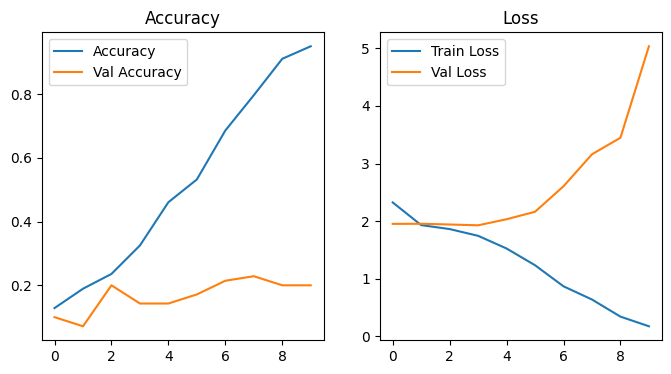

In [7]:
# 6 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
plt.plot(acc,label = 'Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.legend()
plt.title("Loss")
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

image_path = r"C:\Users\shash\Downloads\train (1) (1)\train\Surprise\download (1).jpg"  

img = load_img(image_path, target_size=(img_height, img_width)) 
img_array = img_to_array(img)  
img_array = tf.expand_dims(img_array, 0) 
img_array = img_array / 255.0 

predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]

print("Predicted expression:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Predicted expression: Fear


In [12]:
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]

print("Predicted expression:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted expression: Fear


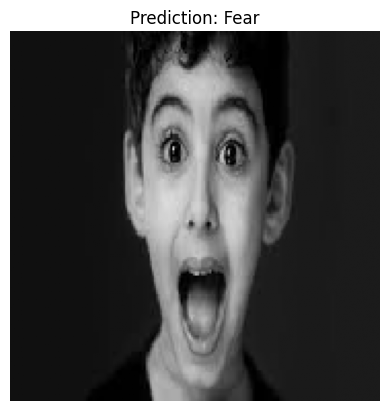

In [ ]:
from tensorflow.keras.utils import load_img,img_to_array
import matplotlib.pyplot as plt

image_path = r"C:\Users\shash\Downloads\train (1) (1)\train\Surprise\download (1).jpg"  
img = load_img(image_path,target_size=(180,180))
img_array = img_to_array(img)

plt.imshow(img_array.astype("uint8")/255.0)
plt.title(f"Prediction: {predicted_class}") 
plt.axis('off')
plt.show()

In [16]:
model.save("D:\Sk\Data Scince\Deep learning\emotion_model.keras")

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\shash\AppData\Local\Temp\ipykernel_18712\1636456690.py:1: SyntaxWarning: invalid escape sequence '\S'
  model.save("D:\Sk\Data Scince\Deep learning\emotion_model.keras")


In [15]:
model.save("D:\Sk\Data Scince\Deep learning\emotion_model.h5")

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\shash\AppData\Local\Temp\ipykernel_18712\4050417874.py:1: SyntaxWarning: invalid escape sequence '\S'
  model.save("D:\Sk\Data Scince\Deep learning\emotion_model.h5")
